In [4]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Cargar un conjunto de datos de ejemplo
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Introducción a las Pruebas y Validación

La validación y prueba de modelos son cruciales para verificar la eficacia y la seguridad antes de desplegar los modelos en producción. Esto incluye técnicas de validación cruzada y el uso de métricas de evaluación específicas para asegurar que los modelos funcionen bien en datos nuevos y desconocidos.


## Técnicas de Validación Cruzada

La validación cruzada es una técnica para evaluar la generalización de los modelos estadísticos. Aquí veremos cómo implementar la validación cruzada de K-folds utilizando Scikit-learn.




In [5]:
# Implementación de K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Resultados de CV: {cv_results}")
print(f"Promedio de CV: {cv_results.mean():.2f}")

Resultados de CV: [0.96703297 0.96703297 0.97802198 0.94505495 0.92307692]
Promedio de CV: 0.96


### Explicación de los Resultados de la Validación Cruzada

La validación cruzada es una técnica esencial para evaluar la capacidad de generalización de un modelo de machine learning. Permite entender cómo un modelo se desempeñará en un conjunto de datos no visto, proporcionando una estimación más robusta del rendimiento del modelo.

#### Resultados de la Validación Cruzada

```plaintext
Resultados de CV: [0.96703297 0.96703297 0.97802198 0.94505495 0.92307692]
Promedio de CV: 0.96
```

#### Desglose de los Resultados

1. **Interpretación de los Resultados de CV**:
   - Estos valores representan las puntuaciones de precisión obtenidas en cada uno de los pliegues (folds) de la validación cruzada.
   - La validación cruzada se realiza dividiendo el conjunto de datos en K partes (folds), entrenando el modelo en K-1 partes y validándolo en la parte restante, repitiendo este proceso K veces.

   Los resultados específicos para cada pliegue son:
   - **Primera iteración**: 0.96703297
   - **Segunda iteración**: 0.96703297
   - **Tercera iteración**: 0.97802198
   - **Cuarta iteración**: 0.94505495
   - **Quinta iteración**: 0.92307692

2. **Promedio de CV**:
   - El promedio de estas puntuaciones de precisión se calcula para obtener una medida general del rendimiento del modelo a lo largo de todas las particiones.
   $$
   \text{Promedio de CV} = \frac{0.96703297 + 0.96703297 + 0.97802198 + 0.94505495 + 0.92307692}{5} = 0.96
   $$

#### Análisis de los Resultados

1. **Consistencia del Modelo**:
   - Los valores de precisión en cada pliegue son bastante consistentes, todos ellos cercanos al rango de 0.92 a 0.97.
   - Esta consistencia sugiere que el modelo es robusto y no está demasiado ajustado a una sola partición del conjunto de datos, lo que es una buena indicación de su capacidad de generalización.

2. **Interpretación del Promedio de CV**:
   - El promedio de 0.96 indica que, en promedio, el modelo tiene una precisión del 96% en predecir correctamente las clases de las instancias en el conjunto de validación.
   - Un promedio alto de precisión significa que el modelo tiene un buen rendimiento general y es capaz de manejar la variabilidad en los datos.

3. **Desempeño de los Pliegues Extremos**:
   - El valor más bajo (0.92307692) y el valor más alto (0.97802198) indican las variaciones en el desempeño del modelo en diferentes particiones del conjunto de datos.
   - Esta variabilidad puede deberse a la naturaleza del conjunto de datos y a cómo se distribuyen las instancias en cada pliegue. Es importante analizar por qué ciertos pliegues tienen un rendimiento menor o mayor, lo que puede dar información sobre posibles ajustes o mejoras necesarias.

#### Conclusión
La validación cruzada con un promedio de precisión de 0.96 y resultados consistentes en todos los pliegues muestra que el modelo es robusto y generaliza bien. Esta evaluación es crucial para confiar en el modelo antes de implementarlo en un entorno de producción. La validación cruzada ayuda a asegurarse de que el modelo no esté sobreajustado a un solo conjunto de datos y que mantendrá su rendimiento cuando se enfrente a datos no vistos.

### Matriz de Confusión

Una matriz de confusión proporciona una representación tabular del rendimiento de un algoritmo de clasificación, mostrando el número de instancias clasificadas correctamente e incorrectamente para cada clase. Vamos a interpretar la matriz de confusión proporcionada:


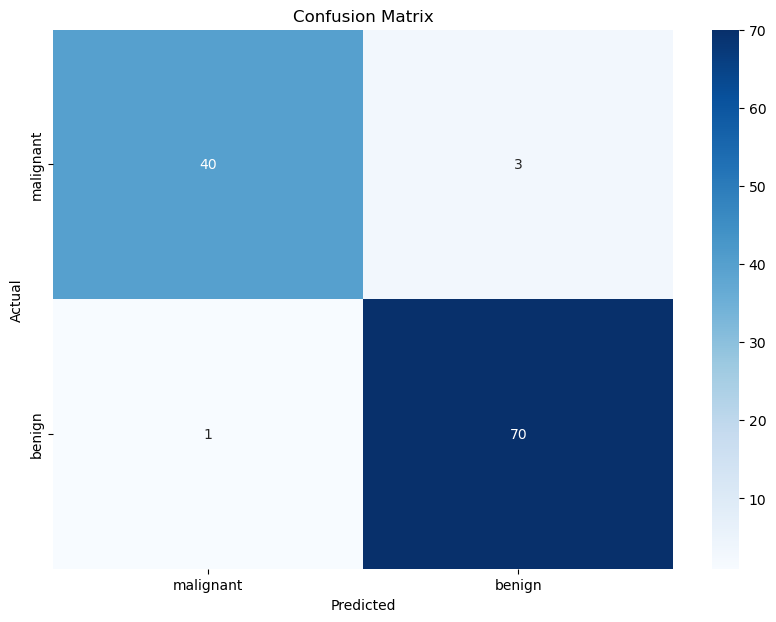

In [23]:
# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando Matplotlib y Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
cm

array([[40,  3],
       [ 1, 70]])

### Interpretación de la Matriz de Confusión

 Vamos a interpretar la matriz de confusión proporcionada:

```plaintext
[[40,  3],
 [ 1, 70]]
```

#### Estructura de la Matriz de Confusión
La matriz tiene la siguiente estructura:

```
              Predicted Class
              |   0   |   1   |
Actual Class  |-------|-------|
      0       |  TP   |  FP   |
              |-------|-------|
      1       |  FN   |  TN   |
```

Donde:
- **TP (True Positive)**: Número de instancias de la clase 0 correctamente predichas como clase 0.
- **FP (False Positive)**: Número de instancias de la clase 1 incorrectamente predichas como clase 0.
- **FN (False Negative)**: Número de instancias de la clase 0 incorrectamente predichas como clase 1.
- **TN (True Negative)**: Número de instancias de la clase 1 correctamente predichas como clase 1.

Para la matriz de confusión dada:

```plaintext
[[40,  3],
 [ 1, 70]]
```

#### Interpretación de los Resultados

1. **True Positives (TP)**:
   - **Valor**: 40
   - **Interpretación**: El modelo predijo correctamente 40 instancias de la clase 0.

2. **False Positives (FP)**:
   - **Valor**: 3
   - **Interpretación**: El modelo incorrectamente predijo 3 instancias de la clase 1 como clase 0. Estos son errores donde la clase negativa fue clasificada como positiva.

3. **False Negatives (FN)**:
   - **Valor**: 1
   - **Interpretación**: El modelo incorrectamente predijo 1 instancia de la clase 0 como clase 1. Estos son errores donde la clase positiva fue clasificada como negativa.

4. **True Negatives (TN)**:
   - **Valor**: 70
   - **Interpretación**: El modelo predijo correctamente 70 instancias de la clase 1.


### Conclusión
La matriz de confusión y sus métricas asociadas proporcionan una visión detallada del rendimiento del modelo. 